In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import operator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

In [2]:
df_resumo_empresas_inner = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_resumo_empresas_inner.csv', delimiter = ',')

In [3]:
df_reembolso_detalhado = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_detalhado.csv', delimiter = ',')

In [4]:
df_reembolso_detalhado["cnpj_cpf_empresa"] = df_reembolso_detalhado["cnpj_cpf_empresa"].apply(
lambda x: x.replace("/",""))
df_reembolso_detalhado["cnpj_cpf_empresa"] = df_reembolso_detalhado["cnpj_cpf_empresa"].apply(
lambda x: x.replace(".",""))
df_reembolso_detalhado["cnpj_cpf_empresa"] = df_reembolso_detalhado["cnpj_cpf_empresa"].apply(
lambda x: int(x.replace("-","")))
df_reembolso_detalhado["cnpj_cpf_empresa"] = df_reembolso_detalhado.cnpj_cpf_empresa.apply(int)

In [5]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'SERVIÇOS POSTAIS']
d['soma_valor_reembolso'].sum()

14459495.559999999

In [6]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'Emissão Bilhete Aéreo']
d['soma_valor_reembolso'].sum()

203271710.54000002

In [7]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'PASSAGENS AÉREAS']
d['soma_valor_reembolso'].sum()

9804663.23

In [8]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'COMBUSTÍVEIS E LUBRIFICANTES.']
d['soma_valor_reembolso'].sum()

72255270.68

In [9]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.']
d['soma_valor_reembolso'].sum()

64324155.89

In [10]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'TELEFONIA']
d['soma_valor_reembolso'].sum()

42292786.67

In [11]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR']
d['soma_valor_reembolso'].sum()

93748126.75999999

In [12]:
d = df_reembolso_detalhado.loc[df_reembolso_detalhado['descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.']
d['soma_valor_reembolso'].sum()

209446867.81

In [13]:
df_reembolso_detalhado['soma_valor_reembolso'].sum()

873859541.6900002

In [14]:
df_reembolso_detalhado = df_reembolso_detalhado.drop('uf', axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('partido', axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('num_agente_politico', axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('fornecedor', axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('soma_valor_reembolso',axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('qtde_reembolsos', axis=1)
df_reembolso_detalhado = df_reembolso_detalhado.drop('nome_completo', axis=1)

In [15]:
df_reembolso_detalhado.columns = ['descricao', 'id_empresa']

In [16]:
df_reembolso_detalhado

,descricao,id_empresa
0,COMBUSTÍVEIS E LUBRIFICANTES.,5562589000135
1,COMBUSTÍVEIS E LUBRIFICANTES.,9164951000170
2,COMBUSTÍVEIS E LUBRIFICANTES.,1332922000169
3,COMBUSTÍVEIS E LUBRIFICANTES.,2379869000548
4,COMBUSTÍVEIS E LUBRIFICANTES.,2379869000114
5,COMBUSTÍVEIS E LUBRIFICANTES.,4979169000196
6,COMBUSTÍVEIS E LUBRIFICANTES.,4979169000196
7,COMBUSTÍVEIS E LUBRIFICANTES.,4979169000196
8,COMBUSTÍVEIS E LUBRIFICANTES.,4979169000196
9,COMBUSTÍVEIS E LUBRIFICANTES.,22398818000147


In [17]:
df = df_reembolso_detalhado.drop_duplicates(subset=['id_empresa'])

In [18]:
df

,descricao,id_empresa
0,COMBUSTÍVEIS E LUBRIFICANTES.,5562589000135
1,COMBUSTÍVEIS E LUBRIFICANTES.,9164951000170
2,COMBUSTÍVEIS E LUBRIFICANTES.,1332922000169
3,COMBUSTÍVEIS E LUBRIFICANTES.,2379869000548
4,COMBUSTÍVEIS E LUBRIFICANTES.,2379869000114
5,COMBUSTÍVEIS E LUBRIFICANTES.,4979169000196
9,COMBUSTÍVEIS E LUBRIFICANTES.,22398818000147
10,COMBUSTÍVEIS E LUBRIFICANTES.,19034367000154
11,COMBUSTÍVEIS E LUBRIFICANTES.,12605987000157
12,COMBUSTÍVEIS E LUBRIFICANTES.,10673213000138


In [19]:
df1 = df_resumo_empresas_inner.merge(df, on = 'id_empresa', how = 'inner')
df1

,id_empresa,nome_empresa,valor_doado,valor_reembolsado,percentual_de_retorno,descricao
0,3777848930,LUCIANO TADAU YAMAGUTI SATO,3000.00,44.00,-98.533333,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO"
1,4197917368,YARA MARIA LIRA PAIVA E SILVA,300.00,42600.00,14100.000000,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
2,9636182884,MAURICIO NUNES MARTINS,3000.00,4000.00,33.333333,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
3,17472415200,CARLOS AUGUSTO LEMOS DE OLIVEIRA,5160.00,99000.00,1818.604651,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
4,49196006900,LOENI LUCIA DAL PRA,30000.00,29200.00,-2.666667,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
5,71480625272,JULIANA DOS SANTOS RODRIGUES,1448.00,129700.00,8857.182320,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
6,83336532191,MARCONES RIBEIRO DE CASTRO,8500.00,10000.00,17.647059,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
7,97626000168,BRASAL COMBUSTIVEIS LTDA,14130.00,9566.98,-32.293135,COMBUSTÍVEIS E LUBRIFICANTES.
8,110791000102,IRMAOS MARINHO LTDA,8500.00,1207.92,-85.789176,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
9,158540000106,COP BEM GRAFICA E EDITORA LTDA EPP,100.00,104160.00,104060.000000,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.


In [20]:
def comunidade(i):
        
        if i < 0:
            return 'Negativo'
        else:
            return 'Positivo'
        

df1['classificacao_roi'] = df1['percentual_de_retorno'].map(comunidade)


In [21]:
df1 = df1.set_index('id_empresa')

In [22]:
df1

,nome_empresa,valor_doado,valor_reembolsado,percentual_de_retorno,descricao,classificacao_roi
id_empresa,,,,,,
3777848930,LUCIANO TADAU YAMAGUTI SATO,3000.00,44.00,-98.533333,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",Negativo
4197917368,YARA MARIA LIRA PAIVA E SILVA,300.00,42600.00,14100.000000,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Positivo
9636182884,MAURICIO NUNES MARTINS,3000.00,4000.00,33.333333,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Positivo
17472415200,CARLOS AUGUSTO LEMOS DE OLIVEIRA,5160.00,99000.00,1818.604651,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Positivo
49196006900,LOENI LUCIA DAL PRA,30000.00,29200.00,-2.666667,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Negativo
71480625272,JULIANA DOS SANTOS RODRIGUES,1448.00,129700.00,8857.182320,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Positivo
83336532191,MARCONES RIBEIRO DE CASTRO,8500.00,10000.00,17.647059,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Positivo
97626000168,BRASAL COMBUSTIVEIS LTDA,14130.00,9566.98,-32.293135,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
110791000102,IRMAOS MARINHO LTDA,8500.00,1207.92,-85.789176,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,Negativo


In [23]:
df2 = df1.loc[df1['classificacao_roi'] == 'Negativo']
df2

,nome_empresa,valor_doado,valor_reembolsado,percentual_de_retorno,descricao,classificacao_roi
id_empresa,,,,,,
3777848930,LUCIANO TADAU YAMAGUTI SATO,3000.00,44.00,-98.533333,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",Negativo
49196006900,LOENI LUCIA DAL PRA,30000.00,29200.00,-2.666667,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Negativo
97626000168,BRASAL COMBUSTIVEIS LTDA,14130.00,9566.98,-32.293135,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
110791000102,IRMAOS MARINHO LTDA,8500.00,1207.92,-85.789176,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,Negativo
187214000119,POSTO DE COMBUSTIVEIS JAGUARIBE LTDA,125000.00,2327.52,-98.137984,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
306597000105,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,168631.99,295.04,-99.825039,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
306597000105,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,31530.00,295.04,-99.064256,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
306597000105,CASCOL COMBUSTIVEIS PARA VE�CULOS,6300.00,295.04,-95.316825,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo
306597000105,CASCOL COMBUSTIVEIS PARA VE�CULOS LTDA,9480.00,295.04,-96.887764,COMBUSTÍVEIS E LUBRIFICANTES.,Negativo


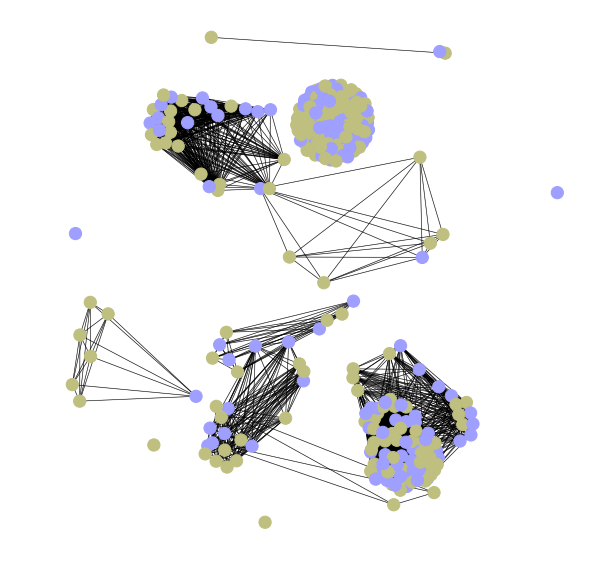

In [26]:
#2.1 Rede representando a o retorno sobre o investimento

plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})

G = nx.OrderedGraph()
G.add_nodes_from([a for a in df1.index])
'''
for ie in set(df1['id_empresa']):
    indices = df1[df1['id_empresa'] == ie].index
    G.add_edges_from(it.product(indices, indices))
for cr in set(df1['classificacao_roi']):
    indices = df1[df1['classificacao_roi']==cr].index
    G.add_edges_from(it.product(indices, indices))
'''

for d in set(df1['descricao']):
    indices1 = df1[df1['descricao']==d].index
    G.add_edges_from(it.product(indices1,indices1))

    

        

#plt.title('Classificação de acordo com o ROI')
color_mapping = {'Negativo': '#bfbf7f',
       'Positivo':'#9f9fff'}

pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(7.5,7.5))
nx.draw(G,pos,node_size = 150, width = 0.5, node_color=df1['classificacao_roi'].replace(color_mapping),
        label = color_mapping.items())
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.savefig('ROI')
#plt.legend(color_mapping)
#plt.title('Classificação de acordo com o ROI')
#plt.plot([color_mapping.values()], label = color_mapping.keys())
plt.show()

In [141]:
nx.number_of_nodes(G)

296

In [142]:
nx.number_of_edges(G)

26678

In [143]:
df1['descricao'].nunique()

15

In [144]:
df1.descricao

id_empresa
3777848930                SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO
4197917368        MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
9636182884        MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
17472415200       MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
49196006900       MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
71480625272       MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
83336532191       MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
97626000168                           COMBUSTÍVEIS E LUBRIFICANTES.
110791000102             FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
158540000106                   DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
187214000119                          COMBUSTÍVEIS E LUBRIFICANTES.
306597000105                          COMBUSTÍVEIS E LUBRIFICANTES.
306597000105                          COMBUSTÍVEIS E LUBRIFICANTES.
306597000105                          COMBUSTÍVEIS E LUBRIFICANTES.
306597000105                         

In [145]:
d = df1.loc[df1['descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.']
d1 = d.loc[d['classificacao_roi'] == 'Positivo']
print(len(d))
print(len(d1))

69
53


In [146]:
d = df1.loc[df1['descricao'] == 'Emissão Bilhete Aéreo.']
d1 = d.loc[d['classificacao_roi'] == 'Positivo']
print(len(d))
print(len(d1))

0
0


In [147]:
d = df1.loc[df1['descricao'] == 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR']
d1 = d.loc[d['classificacao_roi'] == 'Positivo']
print(len(d))
print(len(d1))

24
12


In [148]:
d = df1.loc[df1['descricao'] == 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES']
d1 = d.loc[d['classificacao_roi'] == 'Positivo']
print(len(d))
print(len(d1))

29
24


In [149]:
d = df1.loc[df1['descricao'] == 'PASSAGENS TERRESTRES MARÍTIMAS OU FLUVIAIS']
d1 = d.loc[d['classificacao_roi'] == 'Positivo']
print(len(d))
print(len(d1))

1
1


In [150]:
nx.edges(G)

EdgeView([(3777848930, 3777848930), (3777848930, 10878448000166), (3777848930, 49196006900), (3777848930, 97626000168), (3777848930, 110791000102), (3777848930, 187214000119), (3777848930, 306597000105), (3777848930, 350242000105), (3777848930, 360990000179), (3777848930, 376437000124), (3777848930, 672345000191), (3777848930, 685464000189), (3777848930, 817191000189), (3777848930, 1049700000133), (3777848930, 1059928000104), (3777848930, 1092367000145), (3777848930, 1211430000115), (3777848930, 1506634000183), (3777848930, 1518155000187), (3777848930, 1599219000111), (3777848930, 1664891000143), (3777848930, 1982156000188), (3777848930, 2040344000150), (3777848930, 2088938000130), (3777848930, 2249201000152), (3777848930, 2322969000104), (3777848930, 2326411000105), (3777848930, 2462320000199), (3777848930, 2472487000130), (3777848930, 2686979000129), (3777848930, 2714223000146), (3777848930, 2717608000167), (3777848930, 2780622000105), (3777848930, 2862352000181), (3777848930, 300672

In [151]:
nx.average_clustering(G)

0.8763959944385068

In [152]:
nx.density(G)

0.6110398534127348

In [153]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[(4929683000117, 0.08527153479538306),
 (14029797000164, 0.08527153479538306),
 (42807552000156, 0.08527153479538306),
 (77637684000161, 0.08527153479538306),
 (350242000105, 0.07098757425178394),
 (685464000189, 0.07098757425178394),
 (817191000189, 0.07098757425178394),
 (1599219000111, 0.07098757425178394),
 (6090891000109, 0.07098757425178394),
 (7136697000171, 0.07098757425178394)]

In [154]:
triangles = nx.triangles(G)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[(4929683000117, 26087),
 (14029797000164, 26087),
 (42807552000156, 26087),
 (77637684000161, 26087),
 (97626000168, 17626),
 (187214000119, 17626),
 (306597000105, 17626),
 (360990000179, 17626),
 (376437000124, 17626),
 (672345000191, 17626)]

In [155]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

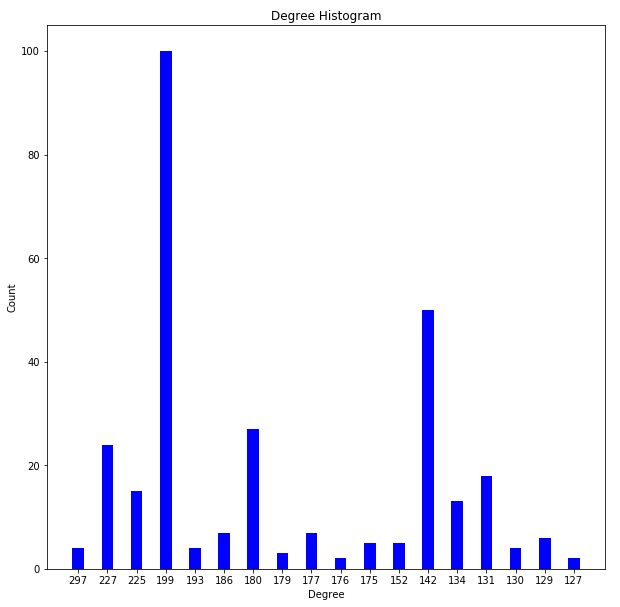

In [156]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(range(len(deg)), cnt, width=0.4, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks(range(len(deg)))
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
'''
nx.draw_networkx_nodes(G, pos, nodelist = nome, node_color='#bfbf7f', node_shape="h", node_size=10)
nx.draw_networkx_nodes(G, pos, nodelist = descricao, node_color='#9f9fff', node_size=10)
nx.draw_networkx_edges(G, pos = nx.kamada_kawai_layout(G), alpha=0.4)
'''
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Histogram_teste.png')
plt.show()

In [ ]:
import networkx.algorithms.community as nxcom
result = nxcom.girvan_newman(G)
communities = next(result)
len(communities)

In [88]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [89]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [92]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G[v]['community']) for v in G.nodes(data=True)]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

TypeError: unhashable type: 'dict'

In [91]:
G.nodes(data=True)

NodeDataView({3777848930: {'community': 1}, 4197917368: {'community': 2}, 9636182884: {'community': 2}, 17472415200: {'community': 2}, 49196006900: {'community': 2}, 71480625272: {'community': 2}, 83336532191: {'community': 2}, 97626000168: {'community': 3}, 110791000102: {'community': 4}, 158540000106: {'community': 5}, 187214000119: {'community': 3}, 306597000105: {'community': 3}, 313221000209: {'community': 3}, 350242000105: {'community': 5}, 360990000179: {'community': 3}, 376437000124: {'community': 3}, 611875000120: {'community': 3}, 613560000111: {'community': 6}, 672345000191: {'community': 3}, 685464000189: {'community': 5}, 692418000107: {'community': 3}, 783707000111: {'community': 5}, 817191000189: {'community': 5}, 961694000123: {'community': 5}, 1014107000151: {'community': 5}, 1049700000133: {'community': 3}, 1059928000104: {'community': 3}, 1092367000145: {'community': 4}, 1109184000195: {'community': 5}, 1109184000438: {'community': 2}, 1211430000115: {'community': 4}